<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2025/2026</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 10 - Unsupervised Learning</center></b></h2>
    <h4><i><b><center>Iris Flower Dataset</center></b></i></h4></td></tr>
</table>

## 1. Introduction 

Clustering is a fundamental unsupervised machine learning technique where the goal is to group similar data points together based on their features. Unlike supervised learning, __clustering does not rely on labeled data but instead finds inherent structures in the data__.

For example, in Biomedical Engineering, clustering is used for:
* Patien segmentation based on health records.
* Identifying groups of similar genes or proteins in genomic studies.
* Classifying different activity patterns form wearable sensor data.

### 1.1 Types of Clustering Techniques
There are several approaches to clustering, each suitable for different types of data and applications:

__1. Partitioning Methods__:
* Divide the dataset into $k$ clusteres, where $k$ is predefined.
* Each data point is assigned to exactly one cluster based on it's distance to the center of the closest cluster
* Examples: __K-Means__, __KMedoids__

__2. Hierarchical Clustering__:
* Builds a tree-like structure of nested clusters (dendogram).
* Can be __agglomerative__ (bottom-up) or __divisive__ (top-down).
* Does not require the number of clusters to be specified in advance.
* Examples: __Agglomerative Clustering__, __Divisive CLustering__.

__3. Density-Based Clustering__:
* Groups data points based on regions of high density separated by low-density areas.
* Can identify clusters of arbitrary shapes and outliers.
* Examples: __DBSCAN (Density-Based Spatial Clustering of Applications with Noise)__, __Ordering Points To Identify the Clustering Structure (OPTICS)__, __MeanShift__.

__4. Distribution-Based Clustering__:
* Assumes data is generated from a mixture of probability distributions.
* Fits the data to statistical model.
* Example: __Gaussian Mixture Model__.

__5. Graph-Based Clustering__:
* Treats the data as a graph where nodes represent data points and edges represent relationships (e.g., similarity or distance).
* Finds clusters by partitioning the graph or identifying dense subgraphs.
* Examples: __Spectral Clustering__, __Affinity Propagation__

<div style="text-align:center;">
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width="800"/>
</div>

Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### 1.2 Goal of Today's Class
The primary goal of today's class is to deepen our understanding of unsupervised learning through hands-on experience with clustering techniques. Specifically, __we will focus on KMeans clustering__, one of the most widely used partitioning methods. By the end of this class, you will be able to:

__1. Implement K-Means from Scratch__:

* Write Python code to implement the KMeans algorithm without relying on built-in libraries.
* Gain insight into the core concepts, such as centroid initialization, cluster assignment, and centroid updates.

__2. Apply K-Means Using scikit-learn__:

* Use the KMeans implementation from scikit-learn to perform clustering on the __Iris dataset__.
* Explore the __Elbow Method__ to determine an optimal number of clusters, in cases where the number of clusters is not known a priori.

__3. Evaluate Clustering Performance__:

* Understand how to measure clustering quality using the __Adjusted Rand Index (ARI)__, a metric that compares the similarity of two cluster assignments.

In [1]:
# --- imports needed for the notebook --- #

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List

## 2. The K-Means Algorithm - Implementation from Scratch

K-Means is one of the most common clustering methods, where data samples are split into $k$ distinct clusters. In an iterative process, cluster centroids are adjusted until a convergence is reached, where all samples are assigned to the closest centroid. The algorithm follows these key steps:

1. __Initialization__: Randomly select $k$ points as initial centroids.

2. __Assignment__: Assign each data point to the cluster with the nearest centroid.

3. __Update__: Recalculate the centroids as the mean of all points in each cluster.

4. __Repeat__: Perform the assignment and update steps until the centroids stabilize or a maximum number of iterations is reached.

<div>
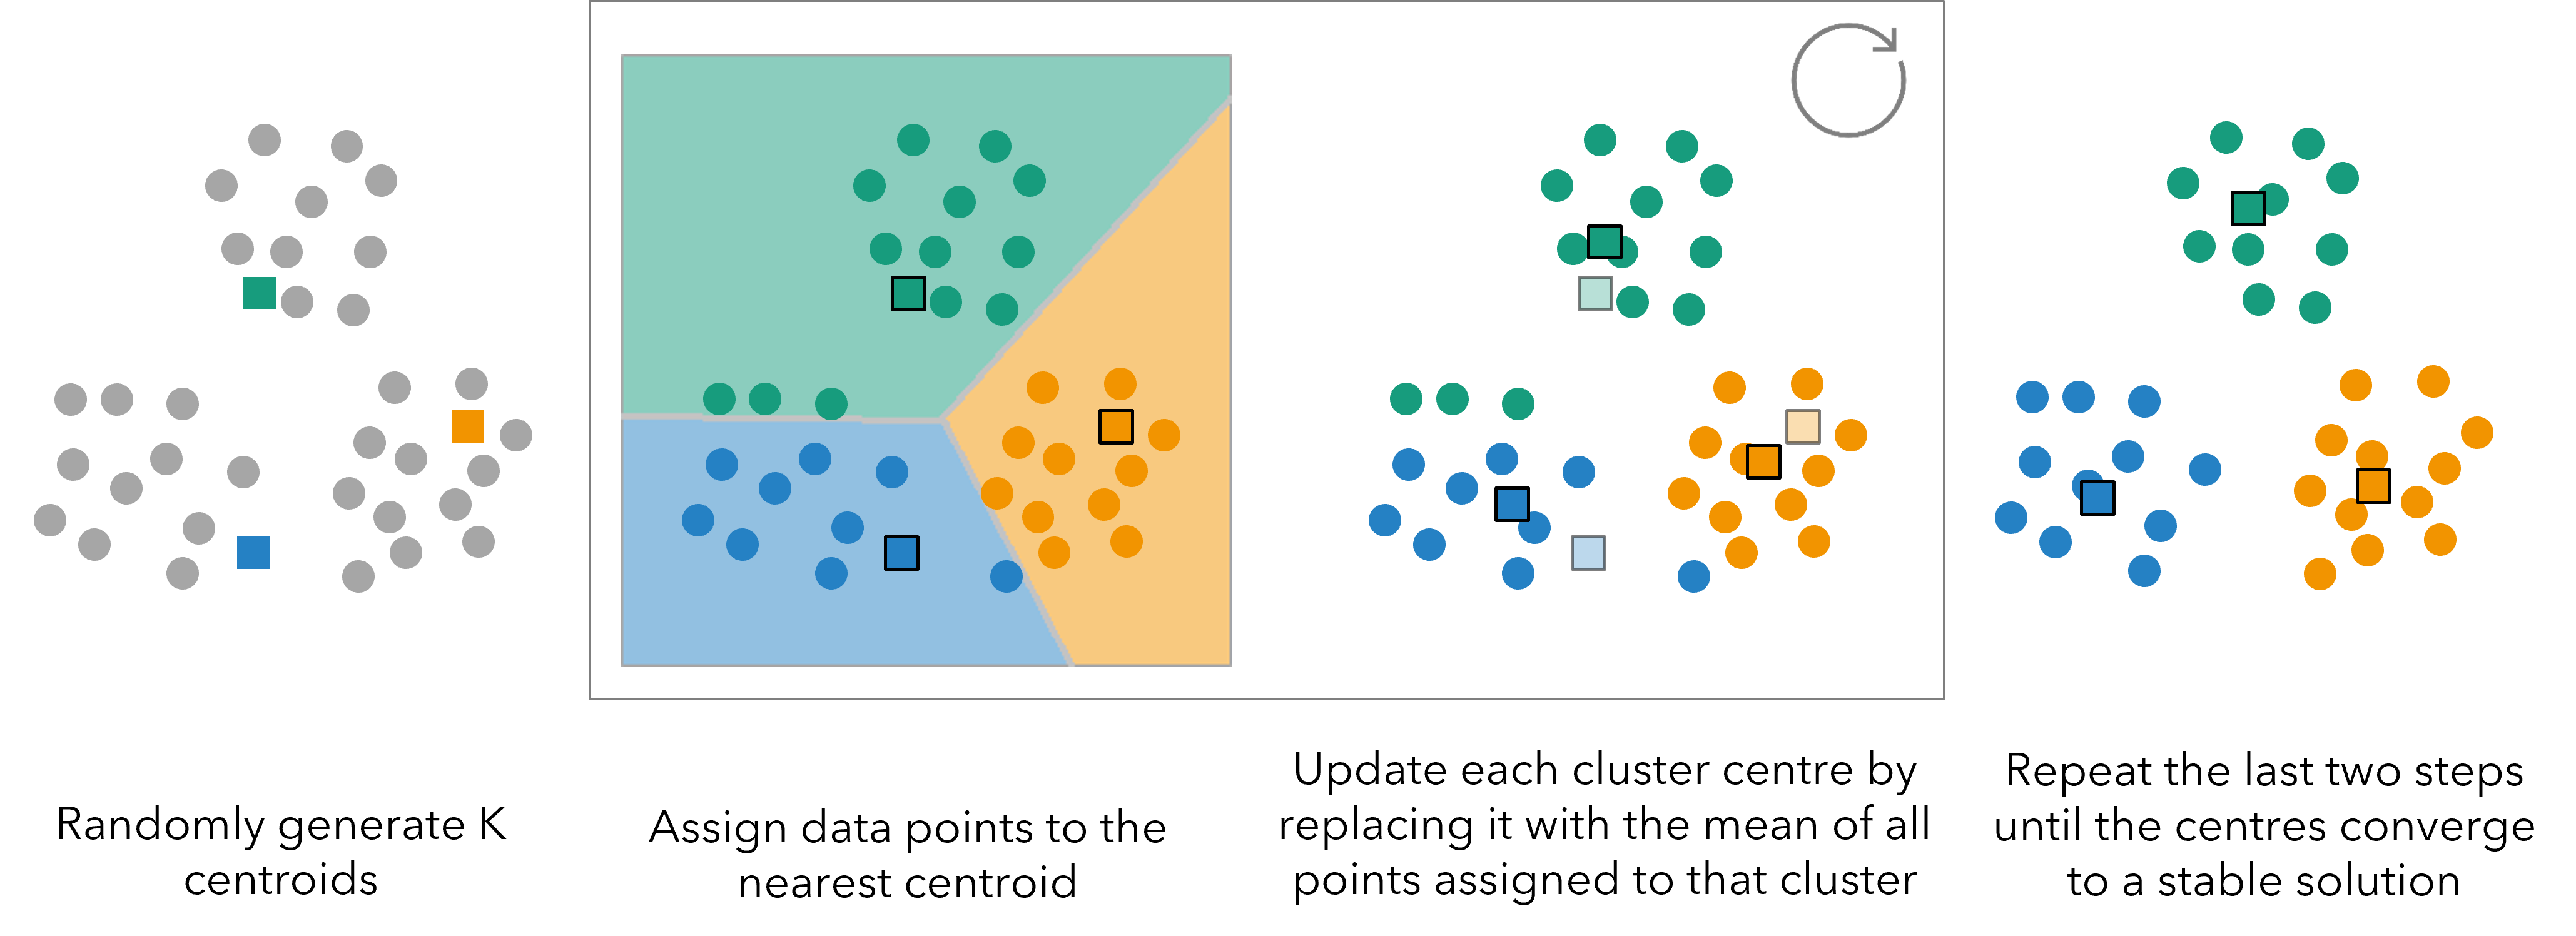
</div>

The K-Means algorithm has some key feeatures, that should be known when using it:
* Requires the user to specify the number of clusters $k$.
* Sensitive to the initial selection of centroids but can use techniques like __K-Means++__ to improve initialization.
* Assumes clusters are roughly spherical and evenely sized.

### 2.1 Synthetic Data Generation and Visualization

As with all ML models we've used, we need data to feed into our model. To simplify things, we will generate a simple toy dataset for implementing K-Means from scratch. The dataset will have the following characteristics:

* __Two features__: Each point will have two-dimensional coordinates.
* __Three classes__: The dataset will contain three distinct clusters.
* __Fifteen points__: A total of 15 samples will be included in the dataset.

#### 2.1.1 Synthetic Data Generation
To generate the toy dataset, we can use the following function from scikit-learn:
* [__make_blobs()__](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [2]:
from sklearn.datasets import make_blobs

# define properties of the dataset
n_features = 2
n_centers = 3
n_samples = 15

# generate the data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=1)

# print the resulting data
print("Features: \n{}".format(X))
print("\nTargets: {}".format(y))

Features: 
[[ -6.16402623  -8.83695596]
 [ -7.33277026  -7.62287264]
 [ -7.75654294  -8.54998163]
 [-10.17014071  -4.83120697]
 [ -0.19745197   2.34634916]
 [ -7.18777241  -9.08899754]
 [ -0.79415228   2.10495117]
 [ -6.16329146  -7.65073377]
 [  0.08525186   3.64528297]
 [ -2.18773166   3.33352125]
 [ -9.95549876  -3.37053333]
 [ -8.86394306  -5.05323981]
 [ -1.34052081   4.15711949]
 [-11.09833168  -2.80862484]
 [-10.32012971  -4.3374029 ]]

Targets: [2 2 2 1 0 2 0 2 0 0 1 1 0 1 1]


#### 2.1.2 Cluster Visualization
Additionally, we are going define a function to plot the clusters and the centroids we are going calculate in each step of our K-Means implementation. This will allow us to verify the correctness of our calculations in each iteration. The function is written in such a way, that it can be used with and without passing the centroids. If no centroids are passed, then just the data is plotted.

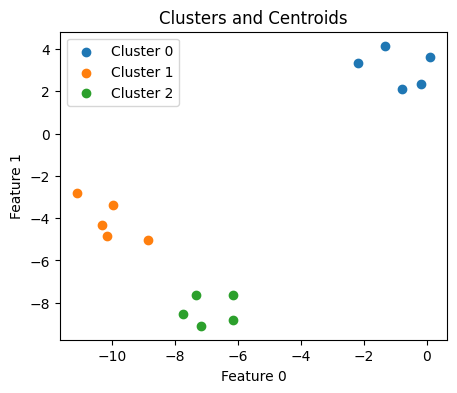

In [3]:
def plot_clusters(X: np.ndarray, y: np.ndarray, centroids: np.ndarray = None, iteration: int = None)-> None:
    """
    Plot the clusters and centroids in a 2D scatter plot.

    This function visualizes data points in a two-dimensional space, where each point is colored based on its cluster
    assignment. Optionally, centroids can be plotted as red 'X' markers to indicate the center of each cluster.

    :param X: The data points to be plotted. It should be a 2D array with shape (n_samples, n_features).
    :param y: The cluster labels for each data point. It should be a 1D array with shape (n_samples,).
    :param centroids: The centroids to be plotted. It should be a 2D array with shape (n_clusters, n_features).
                        If not provided, only the clusters will be plotted. Default is None.
    :param iteration: The number of the current iteration of the k-Means algorithm
    :returns: None
    """
    # Set the size of the figure for better visibility
    plt.figure(figsize=(5, 4))

    # Plot centroids if provided
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

    # Plot each cluster with a different color
    for cluster_label in set(y):
        # Select data points that belong to the current cluster
        cluster_points = X[y == cluster_label]
        # Plot the points for the current cluster
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

    # string for holding the iteration
    iteration_string = ''

    # check if iteration was passed
    if iteration is not None:

        # setup iteration string
        iteration_string = ' | Iteration: {}'.format(iteration)
        
    # Add labels and title to the plot
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('Clusters and Centroids' + iteration_string)

    # Add a legend to indicate which color corresponds to which cluster
    plt.legend()

    # Display the plot
    plt.show()

# plot the data that was generated
plot_clusters(X, y)

### 2.2 Initialization of Centroids

Centroid initialization plays a crucial role in the K-Means algorithm as it significantly impacts the algorithm's convergence and the quality of the final clusters. At the start of the algorithm, centroids are initialized, and the following strategies are commonly used:

__1. Random Initialization__:
* Centroids are randomly chosen from the dataset or generated within the feature space.
* While simple, this method can lead to poor clustering results or slower convergence if the initial centroids are poorly placed.

__2. k-Means++ Initialization__:
* An improvement over random initialization, this method ensures that the initial centroids are spread out.
* The first centroid is selected randomly, and each subsequent centroid is chosen with a probability proportional to its squared distance from the nearest existing centroid.
* This approach often leads to faster convergence and better clustering results.

__3. Custom Initialization__: 
* In some cases, prior knowledge about the data allows for manually specifying the initial centroids.
* This method is rarely used but can be effective in specific scenarios.

Depending on the complexity of the dataset, choosing the appropriate initialization strategy is important, as imporper intialization can lead to:
* __Poort cluster quality__: If centroids start too close to each other or far from actual cluster centers.
* __Convergence to a local optima__: K-Means can converge to a suboptimal solution depending on the start of the centroids.

To address these issues, modern implementations, such as scikit-learn’s K-Means algorithm, use __K-Means++ initialization by default__.

>__However, in the case of our toy example, given the simple structure of the datset, we can go with a somewhat _random_ intialization. We will simply define the first $k$ (which in our case is 3) samples of our dataset as the initial centroids__.

In [ ]:
# define the first three samples as the intial centroids
centroids = X[:n_centers,:]

### 2.3 Assignment

In the assignment step each data point is assigned to the nearest cluster centroid. This step involves two main sub-tasks: __calculating the distance matrix__ and __determining the closest centroid for each data point__.

#### 2.3.1 Calculating the Distance Matrix

The first taks is to compute the distance between each data point and all centroids. This is typically done using the __Euclidean distance__ formula:

$$ d(x, c) = \sqrt{\sum_{i=1}^n (x_i - c_i)^2}$$

Where:
* $x$ represents a data point.
* $c$ represents a centroid.
* $d$ is the calculated distance
* $n$ corresponds tot he number of features/dimensions by which the data point $x$ is defined.

Calculating the distance between each datapoint and the $k$ centroids will result in the __distance matrix ($D$)__ which is of shape $[N, k]$, where $N$ corresponds to the number of data instances/samples. Therefore, in the __distance matrix__:

* Rows correspond to data points.
* Columns correspond to centroids.
* Each entry $D(i,j)$ contains the distance between the $i$-th data point and the $j$-th  centroid.

__Exercise 1__: Create a function to compute the distance matrix, $D$, to each centroid and use this function on the data.

__Hint__: For calculating euclidean distance you can use:  [__scipy.spatial.distance.euclidean()__](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)

In [ ]:
def calc_distance_matrix(centroids: np.ndarray, X: np.ndarray) -> np.ndarray:
    """
    Compute the distance matrix between each sample and each centroid.
    The function calculates the Euclidean distance between each data point
    in X and each centroid in centroids. The result is a distance matrix where
    each row corresponds to a sample and each column corresponds to a centroid.

    :param centroids: A NumPy array of shape (n_centroids, n_features),
                       representing the current centroids.
    :param X: A NumPy array of shape (n_samples, n_features),
              representing the dataset of samples.
    :return: A NumPy array of shape (n_samples, n_centroids) representing the 
             distance between each sample and each centroid.
    """
    # TODO
    
    return distance_matrix

In [ ]:
# calculate the distance matrix
distance_matrix = calc_distance_matrix(centroids, X)

# print the result
print(distance_matrix)

### 2.3.2 Assigning Data Points to Clusters

Once the distance matrix is computed, the next step is to assign each data point to the cluster represented by its nearest centroid. This involves finding the minimum distance for each row of the distance matrix and recording the index of the corresponding centroid.

Mathematically:

$$ \text{Assign}(x_i) = \arg\min_{k} \left( \| x_i - c_k \|^2 \right)$$

Where:
* $\| x_i - c_k \|^2$ represents the Euclidean distance between the data point $x_i$ and the centroid $c_k$.
* $\arg\min_{k}$ finds the centroid that minimizes the distance.

In words: __Each data point $x_i$ is assigned to the cluster corresponding to the closest centroid, where "closest" is defined by the minimum Euclidean distance between $x_i$ and all centroids $c$__. 

The assignment step, produces thus an estimation of which data point belongs to which cluster.

__Exercise 2__: Using the previous distance matrix, find the nearest centroid for each sample and plot the result using the `plot_clusters` function we defined above.

### 2.4 Updating the centroids

After assigning each sample to the nearest centroid, the next step in the K-Means algorithm is to update the centroids. The new centroid for each cluster is recalculated as the mean of all points assigned to that cluster. This step ensures that the centroids represent the "center" of their respective clusters.

Mathematically, the new centroid for cluster $k$ is calculated as the mean of all points assigned to that cluster:

$$ c_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i $$

Where:
* $c_k$ is the new centroid for cluster $k$.
* $N_k$ is the number of points assigned to cluster $k$.
* $C_k$ is the set of points assigned to cluster $k$.
* $x_i$ represnts the individual data points in $C_k$.

__Exercise 3__: Define a function to compute the new centroids.

In [ ]:
def update_centroids(X: np.ndarray, cluster_assignments: np.ndarray) -> np.ndarray:
    """
    Update the centroids of  the estimated clusters.The function calculates the mean of all samples 
    assigned to each cluster to determine the new centroid for each cluster.

    :param X: A NumPy array of shape (n_samples, n_features) representing the dataset.
    :param y_est: A NumPy array of shape (n_samples,) representing the cluster assignments for each sample.
    :return: A NumPy array of shape (n_clusters, n_features) representing the updated centroids.
    """
    # TODO

    return centroids

### 2.5 Repeat - Implementing the K-Means iteration

As explained earlier, the K-Means algorithm is an iterative process that continues as long as the centroids are moving. Once the centroids stabilize (i.e., the centers of all clusters have been determined), the iterative process stops.

A practical way to implement this iterative process is by using a for loop. The for loop runs for a predefined maximum number of iterations, ensuring that the algorithm does not continue indefinitely. The stopping criteria for the loop are as follows:

__1. Maximum number of iterations reached__: In this case the algorithm stops and returns the current cluster assignments and centroids.

__2. The updated centroids are equal to the ones from the previous iteration__: If the updated centroids are identical to those from the previous iteration, it means the centroids have stabilized, indicating that the algorithm has converged.

__3. The shift between the previous and the updated centroids is below a set tolerance value__: In some cases, centroids might continue moving by only very small amounts, indicating that the optimal solution is close but not precisely reachable. To handle this, the algorithm stops if the change in centroid positions between iterations is smaller than a defined tolerance value.

__Exercise 4__: With all steps of the process defined, we can implement the K-Means iterative process. 

__Tasks__:
* Define a function for k-means computation and plot the clusters in each iteration.
* Run your implementation of the k-Means algorithm.
* Print the final cluster assignments and centroids.

_Note_: The code below uses a For-Else loop. The else keyword in the For-Else loop specifies a block of code to be executed when the loop is finished.

In [ ]:
def k_means(X: np.ndarray, n_clusters: int, max_iter: int = 300, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray]:
    """
    Implements the K-Means clustering algorithm.
    The function iteratively refines centroids and cluster assignments using the following steps:
    1. Initialize centroids.
    2. Assign each sample to the nearest centroid.
    3. Update centroids as the mean of assigned samples.
    4. Repeat steps 2 and 3 until convergence or maximum iterations are reached.

    :param X: A NumPy array of shape (n_samples, n_features) representing the dataset to be clustered.
    :param n_clusters: The number of clusters to form.
    :param max_iter: The maximum number of iterations to perform. Default is 300.
    :param tol: Tolerance to determine convergence based on centroid shifts. Default is 1e-4.
    :return: A tuple containing:
             - A NumPy array of shape (n_samples,) representing the cluster assignments for each sample.
             - A NumPy array of shape (n_clusters, n_features) representing the final centroids.
    """
    # Step 1: Initialize centroids by selecting the first `n_clusters` points
    centroids = X[:n_clusters, :]

    # Placeholder for cluster assignments
    cluster_assignments = 

    # Array to save the previous values. In the first iteration assign -1 to all data points
    previous_assignments = np.ones_like(cluster_assignments) * -1  

    # Iterate until convergence or maximum iterations
    for iteration in range(max_iter):
        
        # Step 2: Compute the distance matrix and assign clusters

        
        # Step 3: Update centroids
        updated_centroids = 
        
        # Compute centroid shift (L2 norm of differences)
        centroid_shift = np.linalg.norm(updated_centroids - centroids)

        # Replace the centroids from the previous iteration with the updated centroids

        
        # Visualization of the current clustering state

        
        # Check for convergence
        if np.all(cluster_assignments == previous_assignments) or centroid_shift < tol:
            print(f"Converged in {iteration + 1} iterations.")
            break

        # Update the previous assignments for the next iteration

        
    else:
        print(f"Reached maximum iterations ({max_iter}) without full convergence.")

    return cluster_assignments, centroids

In [ ]:
# run K-Means algorithm
cluster_assignments, centroids = k_means(X, n_clusters=3)

# print the results
print("The final cluster assignments per instance are: \n{}".format(cluster_assignments))
print("\nThe final centroids are: \n{}".format(centroids))

## 3. Applying K-Means using Scikit-learn

Implementing K-Means from scratch helps us understand its inner workings, but in practice, we often rely on well-optimized libraries like Scikit-learn for faster and more reliable results. Scikit-learn provides a highly efficient implementation of K-Means through the class:
* [__KMeans__](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

__Exercise 5__: Use the scikit-learn implementation of the KMeans algorithm to fit the generated data and compare the results with the ones from your implementation, by plotting them.

In [ ]:
from sklearn.cluster import KMeans

# create a KMeans instance

# model fit

# predict the cluster labels


In [ ]:
# get centroids from model
centroids = 

# plot the result using the function defined above


# print the result
print("The final cluster assignments per instance are: \n{}".format(labels))
print("\nThe final centroids are: \n{}".format(centroids))

## 4. Iris Dataset

The Iris dataset is a classic dataset in machine learning and statistics, often used as a benchmark for classification and clustering algorithms. It was introduced by the British statistician and biologist Ronald A. Fisher in 1936 and contains measurements of iris flowers from three species: _Iris setosa_, _Iris versicolor_, and _Iris virginica_.

Clustering algorithms like K-Means can be applied to the Iris dataset to group the samples into clusters without using the species labels. The goal is to see how well the algorithm can group similar samples based on the flower measurements.

### 4.1 Dataset Description

The Iris dataset consists of 150 samples (50 samples for each species) and the following features:

* __Sepal Length__ (in cm)
* __Sepal Width__ (in cm)
* __Petal Length__ (in cm)
* __Petal Width__ (in cm)
* __Species__ (target label, not used in clustering)

The first four columns represent the features, while the species column serves as the target label, which is only used for evaluation purposes in clustering tasks.

### 4.2 Loading and Visualizing the Iris Dataset

Let's load the data and visualize it, to get an understanding of it. For visualization of the data we are going to use the again the [__seaborn__](https://seaborn.pydata.org/) library as it contains a pretty convenient function: 
* [__pairplot()__](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

The pairplot() function in the Seaborn library is a versatile tool for visualizing pairwise relationships between features in a dataset. It generates a grid of scatterplots, showing how each feature relates to every other feature, making it particularly useful for exploratory data analysis.

Key Features of pairplot(): 
* __Pairwise Scatterplots__: For numerical features, pairplot() creates scatterplots between all pairs of features.
* __Diagonal Visualizations__: By default, the diagonal of the plot grid shows distributions of each feature, often as histograms or kernel density plots.
* __Grouping by Hue__: The hue parameter allows grouping data points by a categorical variable, assigning different colors to each group for easier distinction.

In [4]:
from sklearn.datasets import load_iris

# load the iris dataset from schikit-learn
iris = load_iris()

# get the features and target
X = iris['data']
y = iris['target']

# get the feature and target names
feature_names = iris['feature_names']
target_names = iris['target_names']

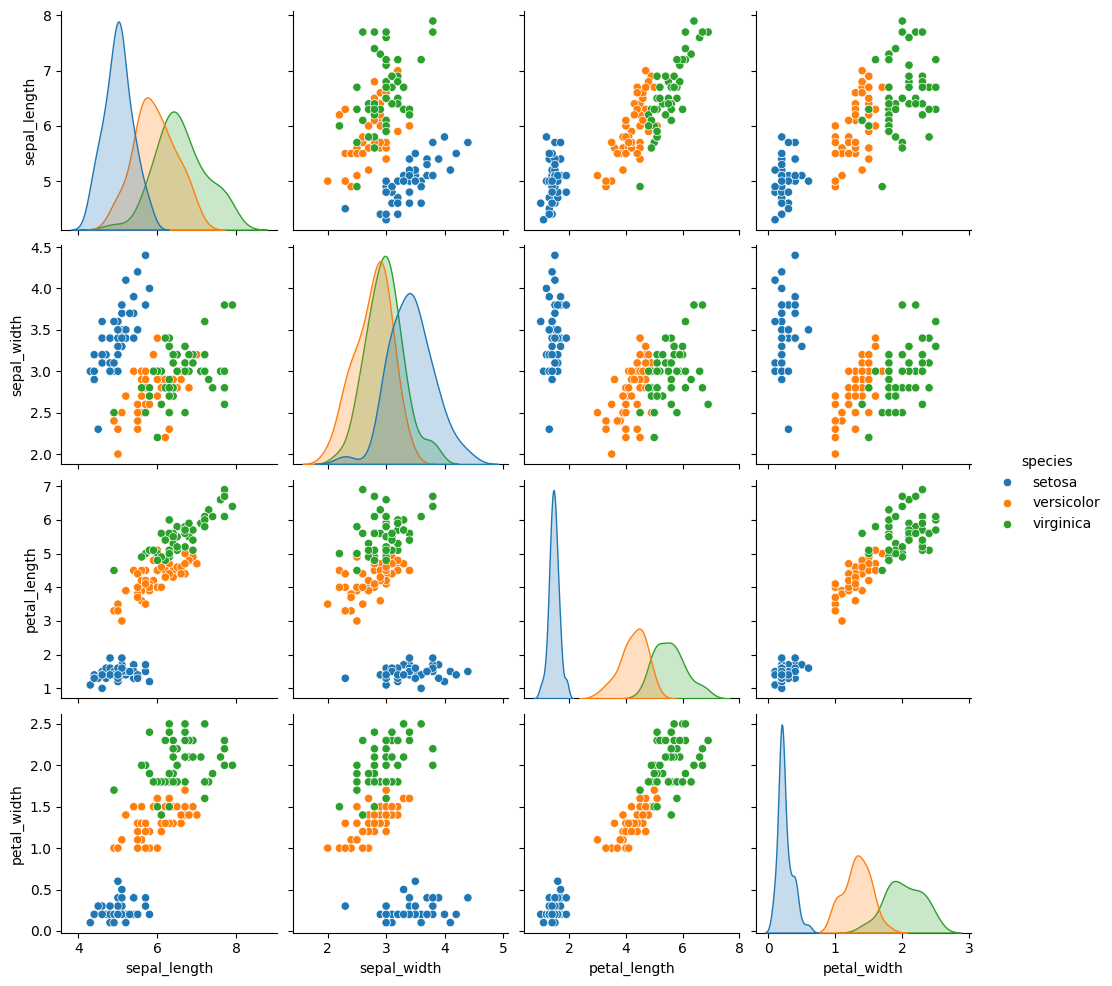

In [5]:
# load dataset from seaborn
# This is done only out of convenience as the seabron library already organized the dataset 
# in such a way that it can be plotted right away.
df = sns.load_dataset('iris')

# seaborn pairplot
sns.pairplot(df, hue='species')

### 4.3 The Elbow Method

Before we start clustering the Iris Dataset, we are going to look at a different problem of clustering that affects models for which the number of clusters has to be defined in advance.

While in most cases, we might know the amount of cluster we expect to find in a dataset, there are cases where this knowledge is not known at all. In those cases it is necessary to determine the amount of clusters through different means. On way to determine the amount of clusters is through the __Elbow Method__.

The Elbow Method is a widely used technique for determining the optimal number of clusters (k) in a dataset when applying clustering algorithms like K-Means. It evaluates the performance of clustering by plotting a metric, such as __inertia, also called the within-cluster sum of squares (WCSS),__ (sum of squared distances of points to their closest cluster center), against the number of clusters.

#### 4.3.1 Key Concept

* __Inertia__: Measures how well the clustering algorithm fits the data. Lower inertia indicates tighter clusters, meaning data points are closer to their centroids.
* As the number of clusters increases, inertia decreases because each cluster contains fewer points, reducing within-cluster distances.

#### 4.3.2 The Elbow Point

* The "elbow point" is the value of $k$ at which the rate of decrease in inertia slows down significantly.
* This point suggests a balance between the number of clusters and the quality of clustering, avoiding underfitting (too few clusters) and overfitting (too many clusters).

#### 4.3.3 Steps to Apply the Elbow Method

1. Fit the K-Means algorithm for a range of cluster numbers (e.g., $k=\{1,...,10\}$).
2. Compute the inertia for each $k$
3. Plot inertia against the number of clusters.
4. Identify the "elbow" where the curve bends sharply. This is often the optimal $k$

__Exercise 6__: Implement the elbow method running the KMeans with a range of __1 - 6 clusters__.

__Tasks__:

* Create a KMeans instance called __model__ with $k$ clusters.
* Fit the model to the iris data.
* Append the value of the __inertia__ attribute of __model__ to the list __inertias__.

In [ ]:
n_clusters = range(1, 6)
inertias = []

# loop with a range of 6 clusters
for k in n_clusters:
    
    # Create a KMeans instance with k clusters: model
    
    # Fit model
    
    # Append the inertia to the list of inertias
    

__Exercise 7__: Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [ ]:
# Plot n_clusters (x-axis) vs inertias (y-axis) and define the axis labels




We can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

__Exercice 8__: Train a KMeans algorithm on the iris Dataset using 3 clusters. Use the provided method to visualize the results the results. What conclusions do you take?

_Note_: To use the predicted labels one can use K-means' attribute `model.labels_`

__Exercise 9:__ Compare the real labels of iris dataset with labels of KMeans. Are the results similar?

In [ ]:
def visualize_k_means(X: np.ndarray, y: np.ndarray, feature_names: List[str], kmeans_labels: np.ndarray) -> None:
    """
    Visualize the results of K-Means clustering compared to the actual labels.

    This function generates scatter plots to compare the ground truth labels (`y`) 
    with the predicted cluster labels (`kmeans_labels`) generated by the K-Means algorithm.
    Two pairs of features are visualized side by side for better understanding.

    :param X: A NumPy array of shape (n_samples, n_features) representing the dataset.
    :param y: A NumPy array of shape (n_samples,) containing the true class labels.
    :param feature_names: A list of feature names, where each name corresponds to a feature in X.
    :param kmeans_labels: A NumPy array of shape (n_samples,) containing the cluster labels assigned by K-Means.
    :return: None. Displays the scatter plots.
    """
    # Create subplots for the first two features
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

    # Scatter plot for actual labels using the first two features
    axes[0].scatter(X[:, 0], X[:, 1], c=y)
    axes[0].set_title('Actual', fontsize=18)
    axes[0].set_xlabel(feature_names[0])  # Set x-axis label to the first feature
    axes[0].set_ylabel(feature_names[1])  # Set y-axis label to the second feature

    # Scatter plot for K-Means labels using the first two features
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
    axes[1].set_title('K-Means', fontsize=18)
    axes[1].set_xlabel(feature_names[0])  # Set x-axis label to the first feature

    # Create subplots for the next two features
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

    # Scatter plot for actual labels using the third and fourth features
    axes[0].scatter(X[:, 2], X[:, 3], c=y)
    axes[0].set_title('Actual', fontsize=18)
    axes[0].set_xlabel(feature_names[2])  # Set x-axis label to the third feature
    axes[0].set_ylabel(feature_names[3])  # Set y-axis label to the fourth feature

    # Scatter plot for K-Means labels using the third and fourth features
    axes[1].scatter(X[:, 2], X[:, 3], c=kmeans_labels)
    axes[1].set_title('K-Means', fontsize=18)
    axes[1].set_xlabel(feature_names[2])  # Set x-axis label to the third feature

    # Display the plots
    plt.show()

In [ ]:
# visualize the data for comparison
visualize_k_means(X, y, feature_names, kmeans_labels)

### 4.4 Evaluating Clustering Algorithms - The Adjusted Rand Score

The Adjusted Rand Score (ARS) is a statistical measure used to evaluate the similarity between two data clusterings. It is particularly useful in clustering tasks where the true labels of data points are known, such as when comparing the output of a clustering algorithm (e.g., K-Means) to ground truth labels.

The ARS computes the agreement between two clustering assignments by considering:

__1. True Positivies (TP)__: Pairs of points that are in the same cluster in both assignments.

__2. True Negatives (TN)__: Pairs of points that are in different clusters in both assignments.

__3. False positives (FP) and false negatives (FN)__: Discrepancies between the clusterings.

The following properties apply to the ARS:

__1. Handles Different Numbers of Clusters__: ARS can compare two clusterings even if they have a different number of clusters.

__2. Chance Adjustment__: By correcting for chance, ARS avoids inflating the score due to random agreements.

__3. Interpretable Range__:
* A score of 1 indicates perfect agreement between clusterings.
* A score of 0 means the clustering is no better than random.
* Negative scores indicate worse-than-random performance.

Just like the evaluation metrics for supervised models, scikit-learn also implementes the ARS through the function:

* [__adjusted_rand_score()__](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

__Exercice 10__: The [`adjusted_rand_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) metric from sklearn allows to evaluate the closeness to reality of a clustering result. Apply this metric to the results.

In [ ]:
from sklearn.metrics import adjusted_rand_score

